In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
pwd

'/Users/wzhang/GeneralAssembly/DAT-06-24/class material/Unit 4'

In [7]:
df = pd.read_csv('Class 18/data/births.csv', index_col = 'Date', parse_dates = True)

In [8]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


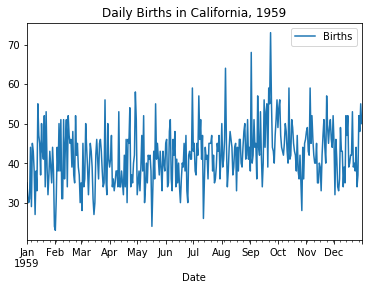

In [9]:
df.plot(title = 'Daily Births in California, 1959')

In [29]:
X_t = df[:-1]['Births'] - df['Births'].mean()
X_t.head()

Date
1959-01-01    -6.980822
1959-01-02    -9.980822
1959-01-03   -11.980822
1959-01-04   -10.980822
1959-01-05     2.019178
Name: Births, dtype: float64

In [30]:
X_t_one = df[1:]['Births'] - df['Births'].mean()
X_t_one.head()

Date
1959-01-02    -9.980822
1959-01-03   -11.980822
1959-01-04   -10.980822
1959-01-05     2.019178
1959-01-06   -12.980822
Name: Births, dtype: float64

In [31]:
X_covar = X_t.values * X_t_one.values
X_covar

array([ 6.96743404e+01,  1.19578450e+02,  1.31559272e+02, -2.21722349e+01,
       -2.62105911e+01, -3.91914130e+01,  3.07708013e+00, -4.05716645e+00,
        5.96359842e+01,  5.96359842e+01,  3.57510527e+01, -1.16922920e+02,
        6.53455733e+01,  1.51537925e+01, -1.50379884e+01, -3.99420980e+01,
        8.17297054e+00, -9.99632201e-01, -9.82702946e+00, -7.99612760e+01,
       -8.79420980e+01, -3.28462075e+01,  2.97510527e+01,  4.97126966e+01,
       -5.07634453e+00, -3.03798837e+00,  2.08085870e+01, -1.40955226e+01,
       -8.03798837e+00,  7.15784500e+01,  3.41290779e+02,  2.08425025e+02,
       -2.21722349e+01, -8.03798837e+00, -3.19229199e+01, -3.19229199e+01,
       -3.59037418e+01, -9.90379884e+01,  1.20578450e+02, -9.90379884e+01,
       -5.39420980e+01, -1.80571664e+01,  2.72305048e+01, -7.19804541e+01,
       -7.99612760e+01,  5.02880390e+01,  1.51537925e+01,  1.21346144e+01,
       -1.19804541e+01, -1.79420980e+01, -2.99804541e+01,  3.47702308e+01,
       -6.99420980e+01,  

In [32]:
X_covar = X_covar.sum() * (1 / len(df))
X_covar

11.698208787790765

In [21]:
X_t_ini = df[:-10]['Births'] - df['Births'].mean()
X_t_ini.head()


Date
1959-01-01    -6.980822
1959-01-02    -9.980822
1959-01-03   -11.980822
1959-01-04   -10.980822
1959-01-05     2.019178
Name: Births, dtype: float64

In [22]:
X_t_ten = df[10:]['Births'] - df['Births'].mean()
X_t_ten.head()


Date
1959-01-11    -3.980822
1959-01-12    -8.980822
1959-01-13    13.019178
1959-01-14     5.019178
1959-01-15     3.019178
Name: Births, dtype: float64

In [23]:
X_covar = X_t_ini.values * X_t_ten.values
X_covar

array([ 2.77894089e+01,  8.96359842e+01, -1.55980454e+02, -5.51147007e+01,
        6.09625821e+00,  6.46551623e+01,  2.42113267e+01,  1.03872396e+00,
        3.90447739e+00, -1.50095523e+02,  3.17702308e+01, -9.89612760e+01,
       -3.88078514e+01, -5.00955226e+01, -1.50379884e+01, -5.07634453e+00,
       -2.39037418e+01, -7.11470069e+00, -1.98045412e+00, -3.98845637e+01,
        1.43501738e+02, -2.09153057e+02,  3.27318746e+01, -2.01530569e+01,
        1.98277651e+01,  8.17297054e+00,  1.18661212e+01, -6.29612760e+01,
       -2.21722349e+01,  4.37126966e+01, -1.62172235e+02,  1.13520916e+02,
       -3.31530569e+01,  1.82113267e+01,  3.17702308e+01,  8.03455733e+01,
       -1.99804541e+01,  2.72305048e+01, -4.41338788e+01,  3.27318746e+01,
        5.42880390e+01,  2.97894089e+01, -2.10763445e+01,  9.03647514e+01,
       -1.53056859e-01,  3.02496829e+01, -1.49612760e+01, -1.50379884e+01,
       -4.81530569e+01,  2.08085870e+01, -8.41530569e+01, -1.50379884e+01,
        5.57126966e+01, -

In [24]:
X_covar_value = X_covar.sum() * (1 / len(df))
X_covar_value

2.5747994560649015

In [26]:
# autocovariance at lag 0
df['Births'].var()

53.996883937979796

In [33]:
# at lag 1
X_covar /df['Births'].var()

0.21664599759547595

In [34]:
# at lag 10
X_covar_value /df['Births'].var()

0.047684223019652146

In [36]:
from statsmodels.tsa.stattools import acf, acovf

In [45]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [39]:
acf(df)  # a little different from the calculation above, because it's using N-1 for variance

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

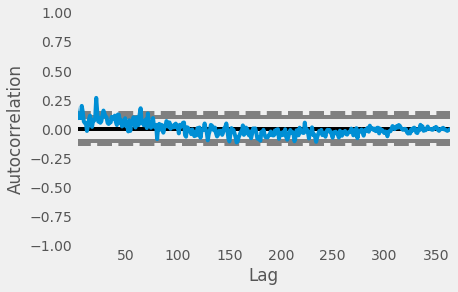

In [44]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
plt.style.use('fivethirtyeight')

autocorrelation_plot(df)

In [47]:
pwd

'/Users/wzhang/GeneralAssembly/DAT-06-24/class material/Unit 4'

In [49]:

df = pd.read_csv('Class 18/data/AirPassengers.csv',index_col = 'Month', parse_dates = True)

In [50]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [51]:
df.Passengers.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [52]:
df.Passengers.diff() # periods - adjust the lags

Month
1949-01-01      NaN
1949-02-01      6.0
1949-03-01     14.0
1949-04-01     -3.0
1949-05-01     -8.0
1949-06-01     14.0
1949-07-01     13.0
1949-08-01      0.0
1949-09-01    -12.0
1949-10-01    -17.0
1949-11-01    -15.0
1949-12-01     14.0
1950-01-01     -3.0
1950-02-01     11.0
1950-03-01     15.0
1950-04-01     -6.0
1950-05-01    -10.0
1950-06-01     24.0
1950-07-01     21.0
1950-08-01      0.0
1950-09-01    -12.0
1950-10-01    -25.0
1950-11-01    -19.0
1950-12-01     26.0
1951-01-01      5.0
1951-02-01      5.0
1951-03-01     28.0
1951-04-01    -15.0
1951-05-01      9.0
1951-06-01      6.0
              ...  
1958-07-01     56.0
1958-08-01     14.0
1958-09-01   -101.0
1958-10-01    -45.0
1958-11-01    -49.0
1958-12-01     27.0
1959-01-01     23.0
1959-02-01    -18.0
1959-03-01     64.0
1959-04-01    -10.0
1959-05-01     24.0
1959-06-01     52.0
1959-07-01     76.0
1959-08-01     11.0
1959-09-01    -96.0
1959-10-01    -56.0
1959-11-01    -45.0
1959-12-01     43.0
1960-01-01    

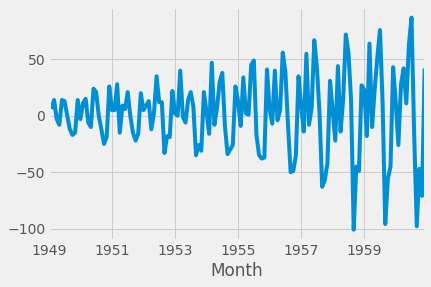

In [53]:
df.Passengers.diff().plot()

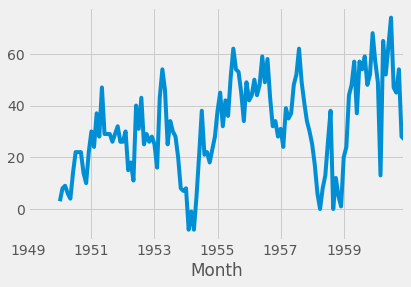

In [55]:
df.Passengers.diff(periods = 12).plot()

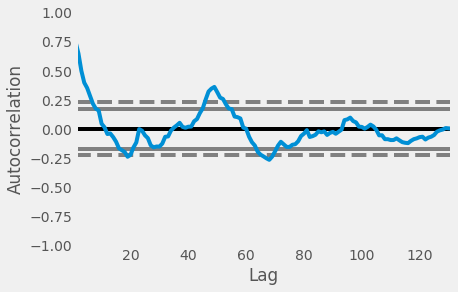

In [60]:
autocorrelation_plot(df.Passengers.diff(periods = 12)[13:])

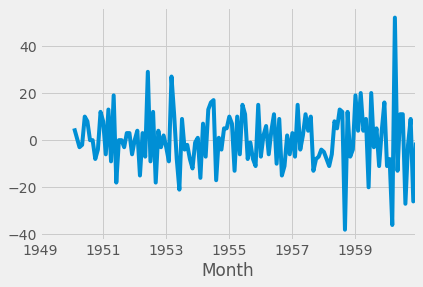

In [62]:
df.Passengers.diff().diff(periods = 12).plot()

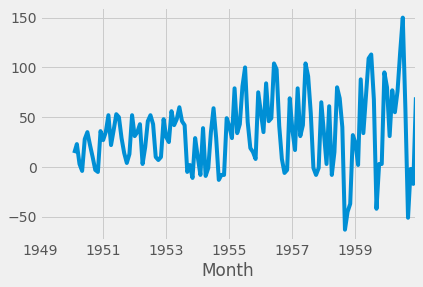

In [63]:
df.Passengers.diff(periods = 13).plot()

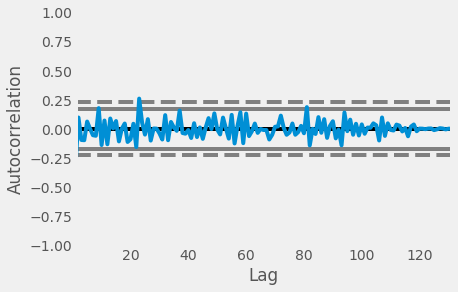

In [64]:
autocorrelation_plot(df.Passengers.diff().diff(periods = 12)[13:])